# Welcome to the Data Visualization Workshop! 
# Brought to you by Sammy and Sammy


In [13]:
# !pip install --upgrade numpy -q
# !pip install --upgrade bokeh -q

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
plt.style.use('fivethirtyeight')
import ipywidgets as widgets
%matplotlib inline

*Matplotlib Section*

In [4]:
boba = pd.read_csv('bayarea_boba_spots.csv')
boba.iloc[:, 2:]
counts = boba.groupby('city').count().reset_index()
berk_boba = boba[(boba['rating']>=3)]
counts = berk_boba.groupby('city').mean().reset_index().head(10)
counts
#plt.bar(counts['city'], counts['name'])

,city,Unnamed: 0,rating,lat,long
0,Alameda,274.555556,3.611111,37.767759,-122.250787
1,Albany,527.000000,3.500000,37.890230,-122.296260
2,American Canyon,189.500000,3.500000,38.169563,-122.254208
3,Antioch,487.250000,3.750000,37.993642,-121.816708
4,Belmont,512.666667,3.833333,37.517720,-122.282454
5,Benicia,489.333333,4.166667,38.056272,-122.158937
6,Berkeley,196.800000,3.850000,37.869487,-122.263191
7,Brentwood,458.666667,4.000000,37.947816,-121.723177
8,Brisbane,129.000000,4.500000,37.683464,-122.402889
9,Burlingame,405.000000,4.357143,37.582543,-122.351709


![title](sn.png)

The seaborn library provides a high-level API on top of the base matplotlib functionality. While matplotlib provides ease of use for basic plot types (scatter, line, pie, etc.), seaborn allows you to easily create more advanced plots for statistical visualization. Additionally, its defaults (color, sizing, etc.) are generally more aesthetically appealing. 

The built-in `tips` dataset in `seaborn` is useful for exploring the different visualizations.

In [22]:
sns.set()
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The function `relplot()` is designed to visualize different statistical relationships. Relationships where one variable represents a measure of time are better represented by a line, whereas the relationship between two variables are  effectively represented with a scatterplot. The `relplot()` function has a convenient `kind` parameter to let you easily switch to this alternate representation.

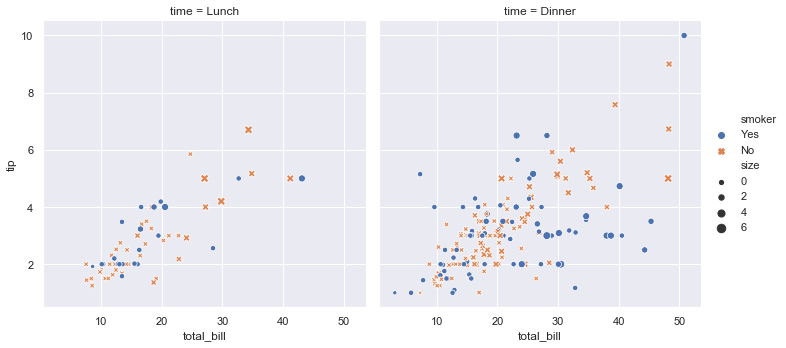

In [23]:
sns.relplot(x="total_bill", y="tip", 
            col="time", # Categorical variables that will determine the faceting of the grid.
            hue="smoker", # Grouping variable that will produce elements with different colors.
            style="smoker", # Grouping variable that will produce elements with different styles.
            size="size", # Grouping variable that will produce elements with different sizes.
            kind = 'scatter',
            data=tips);

Statistical estimation in seaborn goes beyond descriptive statisitics. Using `lmplot()`, we can enhance a scatterplot to include a linear regression model (and its uncertainty).

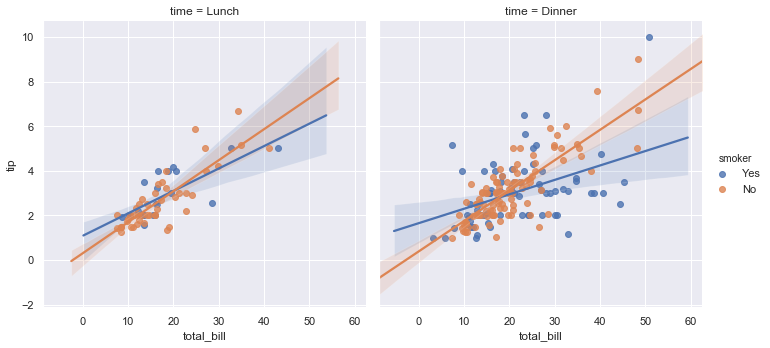

In [24]:
sns.lmplot(x="total_bill", y="tip", 
           col="time", # Categorical variables that will determine the faceting of the grid.
           hue="smoker", # Grouping variable that will produce elements with different colors.
           data=tips);

One of the main advantages to using `seaborns` is that it can be used to create advanced plots for statistical visualization that are very difficult to create effectively in `matplotlib`.

`catplot()` is a dataset-oriented API that generalizes over different representations of the relationship between one numeric variable and one (or more) categorical variables.

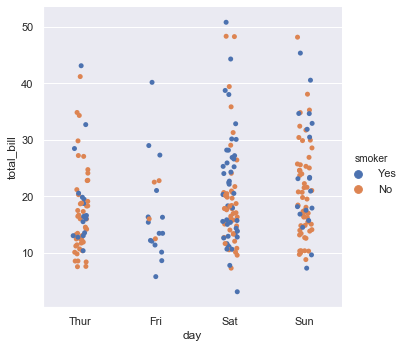

In [28]:
sns.catplot(x="day", y="total_bill", 
            hue="smoker", # Grouping variable that will produce elements with different colors.
            kind="strip", data=tips);

By changing the `kind` parameter we can see a few more examples of different plots. **Try swapping `strip` out for one of these: `swarm`, `point`, `bar`, `violin`, `box`, or `boxen`.** How simple!

Next we will explore how `seaborns` can be used to make visualizations with multiple plots.

`jointplot()` can be used to plot two variables, with bivariate and univariate graphs.

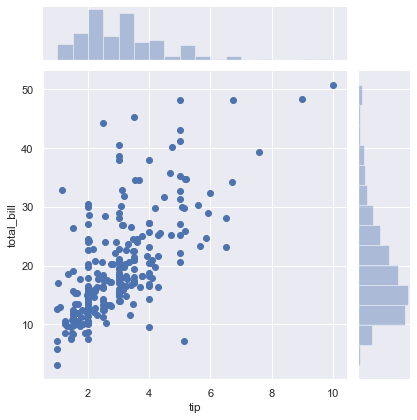

In [29]:
sns.jointplot(x="tip", y="total_bill", data=tips);

As seen before, we can change the `kind` parameter to alter our visualization. Let's try adding the `kind` parameter in the plot from above to create different plots! The options are:  `scatter` (default), `reg`, `resid`, `kde`, `hex`. 

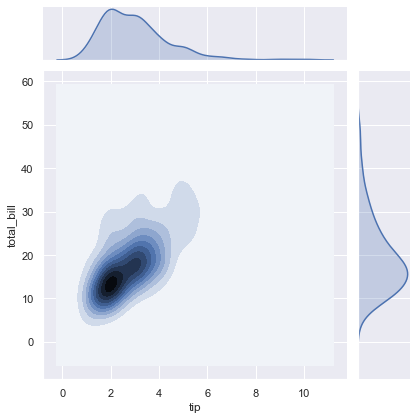

In [31]:
sns.jointplot(x="tip", y="total_bill",
              kind = 'kde', #using kde replaces the scatterplots and histograms with density estimates
              data=tips);

 `pairplot()` allows us to see both distribution of single variables and relationships between two variables in a matrix of plots. *Since `tips` has 3 numerical variables, the pair plot will have 9 plots.*

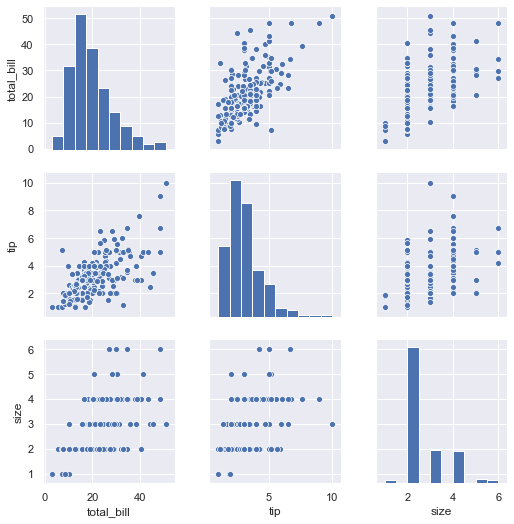

In [34]:
sns.pairplot(tips);

To incorporate categorical variables, add the parameter `hue`.

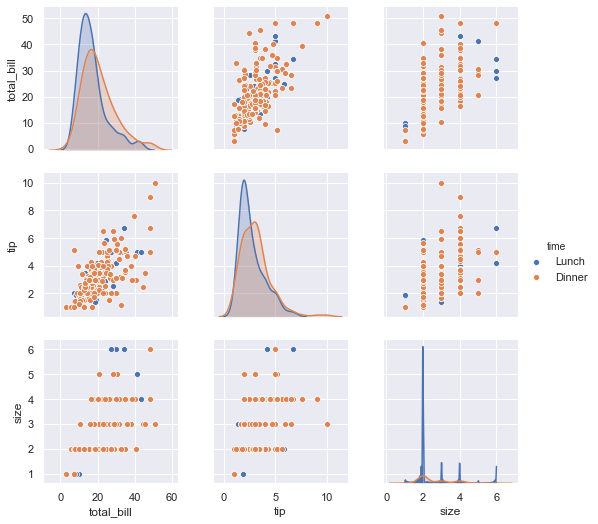

In [36]:
sns.pairplot(tips, hue= 'time');

*Seaborns is particularly favorable in simplifying the code needed for simple figure modifications, making advanced plots, and managing Dataframes.*
The uses of seaborns goes way beyond the examples outlined here. Try playing around with different parameters and exploring the documentation for this library to make some cool visualizations!

*Bokeh Section*

# Bokeh!

Bokeh is another data visualization library that is often more practical and interactive than matplotlib. Bokeh is usually great for large sets of data and/or presentations because of its versility. We'll be looking at some of the features/functions that Bokeh has to offer.

The bokeh library is relatively similar to ggplot in that you build up visualizations one layer at a time (in ggplot, u add "geoms", in bokeh, you add "glpyhs" (i.e. circles, lines, rectangles, patches, bars, etc.). 


We'll start off with some basics

In [5]:
from bokeh.plotting import * 
from bokeh.io import output_notebook

output_notebook() #need this to load/show/interact in the notebook

Loading BokehJS ...

In [6]:
#SCATTER PLOTS (circle) +  LINE PLOTS (line):

data = {'x_values': [1, 2, 3, 4, 5, 3, 2, 4],
        'y_values': [4, 5, 2, 3, 4, 4, 3, 5]}

#need to create figure first before plotting
#inside figure, you can specify the size/limits, titles/labels and other aspects important for the graph

#can also specify the specific tools you want to include in your plot
#http://docs.bokeh.org/en/1.0.0/docs/user_guide/tools.html (can find more here)
TOOLS ="pan, wheel_zoom, box_zoom,reset, save, box_select, lasso_select"
a = figure(tools=TOOLS, width=250, height=250)
a.circle(x=data["x_values"], y=data["y_values"]) #circle is equivalent to scatter plots
show(a)

In [7]:
#COLUMN DATA SOURCE: 
# if you want to share data between plots, you can use the column data source method
# which will allow you to create plots that have the same values for x or y 
# using a column data source/plotting by sharing also allows for "linked selection"
# linked selection makes it much easier to compare plots 
# (i.e. selecting one point on one graph will highlight a corresponding point in the other graph)
# all you need to do is create a shared range and to include/select the right tools

from bokeh.models import ColumnDataSource
import numpy as np

# random data
N = 100
x = np.linspace(0, 4*np.pi, N)
h = np.cos(3*x)
y0 = np.sin(3*x)
y1 = np.cos(x)

# create a column data source for the plots to share
source = ColumnDataSource(data=dict(x=h, y0=y0, y1=y1))

TOOLS = "box_select, lasso_select, hover, reset"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=350, height=350, title=None)
left.circle('x', 'y0', source=source, hover_color="firebrick") #adding a color when hovering helps to pick out the corresonding points

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=350, height=350, title=None)
right.circle('x', 'y1', source=source, hover_color="firebrick", size=15) #can change the size

# put the subplots in a gridplot
p = gridplot([[left, right]])

# show the results
show(p)

In [9]:
# MULTIPLE LAYOUTS (horizontal/vertical/grid layouts)

from bokeh.layouts import column, row, gridplot

#for vertical plots, you just need to create multiple figure plots one after another
#or you can use the column function
# for horizontal plots, you need to use row
# if you want to create grid layouts, just use gridplot and enter in the plots as a list/matrix 
# for gridplots (if you want an empty space, just enter in None in place of a plot)

x = [1, 2, 3]
y = [2, 3, 4]

TOOLS = "wheel_zoom, reset" #zoom in and out tool
plot1 = figure(tools=TOOLS, width=200, height=200)
plot1.line(x, y, color="red")
# show(plot1)

plot2 = figure(width=200, height=200)
plot2.triangle(x, y, size=10) #different shapes for scatter plot points available (triangle, square, circle,)
# show(plot2)

#etc. if you want to add more

#you could do "show(...)" or you could add them all to one "column" to avoid being redundant, 
#they'll also show up all at once instead of one at a time, just note that you will need to import it from bokeh.layouts

p = column(plot1, plot2)
show(p) 


In [10]:
#horizontal layout + GRID layouts
from bokeh.palettes import Spectral6 #import a color palette

print("HORIZONTAL LAYOUT")
show(row(plot1, plot2))

# bar charts/graphs:
fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
counts = [5, 3, 4, 2, 4, 6]

plot3 = figure(x_range=fruits, height=200) #note that when creating bar charts the params for figure are different
plot3.vbar(x=fruits, top=counts, width=0.9, color=Spectral6)

print("GRID LAYOUT")
show(gridplot([[plot1, None], [None, plot2], [plot3]]))

HORIZONTAL LAYOUT


GRID LAYOUT


In [11]:
#math 
#(if you want to learn/seee more cool math visualizations (in R): http://fronkonstin.com)
points = 500
angle = np.pi*(3 - np.sqrt(5)) #golden ratio

t = np.arange(1, points)* angle
x = np.sin(t)
y = np.cos(t)

spiral = figure()
spiral.line(x*t, y*t)
spiral.circle(x*t, y*t, color="yellow") 
#overlaying plots is also really easy, just use the same figure and call a different plotting method

show(spiral)

You can also include widgets and include snippets of javascript code with bokeh to create complete dashboards!

In [220]:
from bokeh.models.widgets import Button, RadioButtonGroup, Select, Slider #widgets in the library 
from bokeh.models.callbacks import CustomJS #insert javascripts

# adding "output_file" allows you to export widgets/visualizations to html files
# but note that once you call this function, by default everytime you fun a cell
# it'll generate a new window/tab (i.e. exports a file)
# and you would need to reset the output sequence with the following: 
# reset_output()
# output_notebook()


# output_file("layout_widgets.html")

# create some widgets
slider = Slider(start=0, end=10, value=1, step=.1, title="Slider")
button_group = RadioButtonGroup(labels=["Option 1", "Option 2", "Option 3"], active=0)
select = Select(title="Option:", value="a", options=["a", "b", "c", "d"])
button = Button(label="Click Me (but nothing's ganna happen)")

def linked_interactions(): 
    slider = Slider(start=0, end=10, value=1, step=.1, title="Slider")
    x = [1, 2, 3, 4, 5]
    y = [2, 4, 6, 8, 10]

    plt = figure(width=200, height=150)
    plt.circle(x, y)
    
show(column(button, button_group, select, slider, width=300))

In [225]:
# http://docs.bokeh.org/en/1.0.4/docs/user_guide/interaction/callbacks.html#userguide-interaction-jscallbacks
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.plotting import Figure, output_file, show

# output_file("js_on_change.html")

x = [x*0.005 for x in range(0, 200)]
y = x

source = ColumnDataSource(data=dict(x=x, y=y))

plot = Figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var f = cb_obj.value
    var x = data['x']
    var y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = Math.pow(x[i], f)
    }
    source.change.emit();
""")

slider = Slider(start=0.1, end=4, value=1, step=.1, title="power")
slider.js_on_change('value', callback)

layout = column(slider, plot)

show(layout)

In [226]:
reset_output()
output_notebook()

Loading BokehJS ...